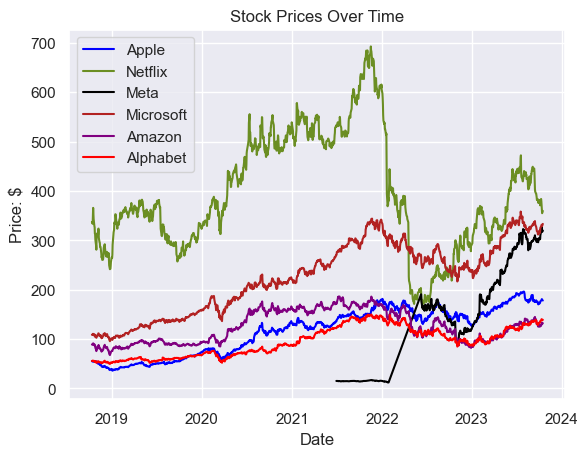

In [1]:
import matplotlib.pyplot as plt


import pandas as pd
import pandas_gbq
import seaborn as sns; sns.set()

DATABASE_NAME = "etl"
PROJECT_ID = "new-life-400922"
TABLE_NAME = "res_tickers_history"

def query_ticker_data(ticker):
    sql = f"""
        SELECT *
        FROM `new-life-400922.etl.res_tickers_history`
        WHERE ticker = '{ticker}'
    """
    # Run a Standard SQL query with the project set explicitly
    df = pd.read_gbq(sql, project_id=PROJECT_ID, dialect="standard")
    return df

apple = query_ticker_data('AAPL')
netflix = query_ticker_data('NFLX')
meta = query_ticker_data('META')
microsoft = query_ticker_data('MSFT')
amazon = query_ticker_data('AMZN')
alphabet = query_ticker_data('GOOGL')

apple.name = "Apple"
netflix.name = "Netflix"
meta.name = "Meta"
microsoft.name = "Microsoft"
amazon.name = "Amazon"
alphabet.name = "Alphabet"

%matplotlib inline


company = [apple, netflix, meta, microsoft, amazon, alphabet]
colorr = ['blue', 'olivedrab', 'black','firebrick','purple', 'red']    
for cmp, clr in zip(company,colorr):
    ax = sns.lineplot(data=cmp,x="date",y="volume_weighted_average_price",color=clr,label=cmp.name)
    ax.set(xlabel='Date',
       ylabel='Price: $',
       title='Stock Prices Over Time')

plt.show()